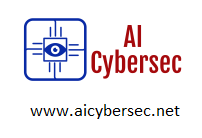
# Ridge and Lasso Regression

## Introduction

At this point, you've seen a number of criteria and algorithms for fitting regression models to data. You've seen the simple linear regression using ordinary least squares, and its more general regression of polynomial functions. You've also seen how we can overfit models to data using polynomials and interactions. With all of that, you began to explore other tools to analyze this general problem of overfitting versus underfitting, all this using training and test splits, bias and variance, and cross validation.

Now you're going to take a look at another way to tune the models you create. These methods all modify the mean squared error function that you are optimizing against. The modifications will add a penalty for large coefficient weights in the resulting model.

## Objectives

You will be able to:

- Define Lasso regression 
- Define Ridge regression 
- Describe why standardization is necessary before Ridge and Lasso regression 
- Compare and contrast Lasso, Ridge, and non-regularized regression 
- Use Lasso and Ridge regression with scikit-learn 

#### Before regularisation:

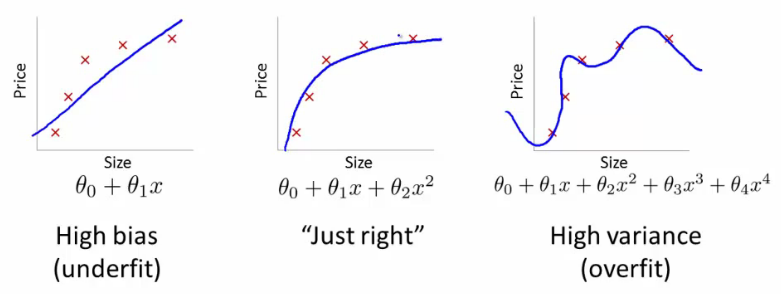

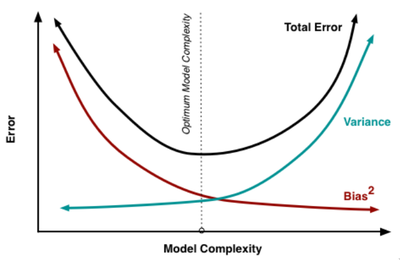

#### After regularisation:
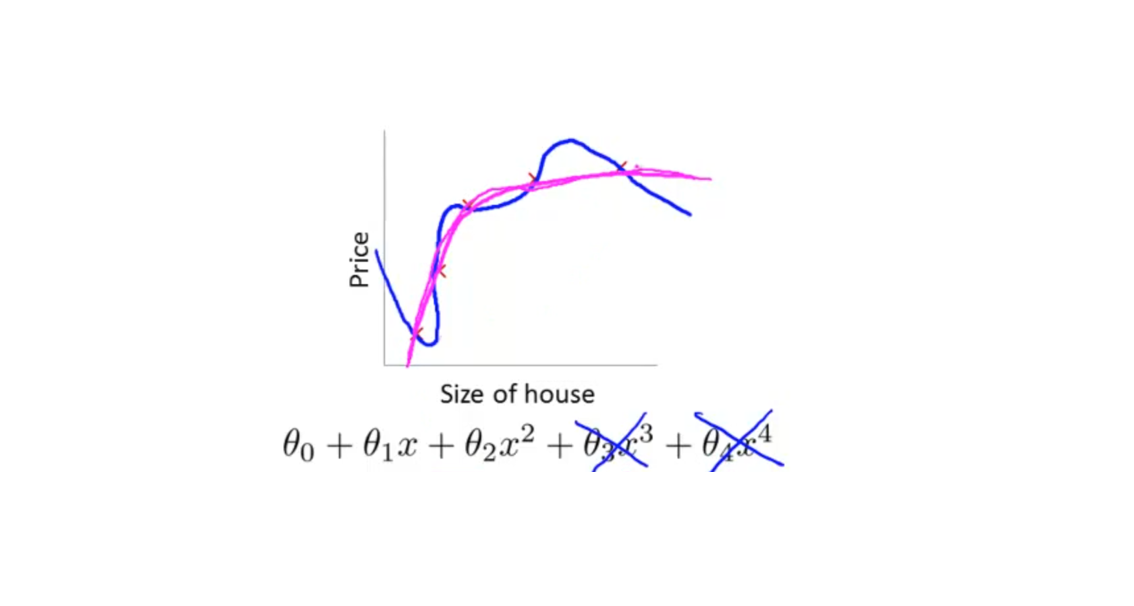

## Our regression cost function

From an earlier lesson, you know that when solving for a linear regression, you can express the cost function as

$$ \text{cost_function}= \sum_{i=1}^n(y_i - \hat{y})^2 = \sum_{i=1}^n(y_i - (mx_i + b))^2$$

This is the expression for simple linear regression (for 1 predictor $x$). If you have multiple predictors, you would have something that looks like:

$$ \text{cost_function}= \sum_{i=1}^n(y_i - \hat{y})^2 = \sum_{i=1}^n(y_i - \sum_{j=1}^k(m_jx_{ij} ) -b )^2$$

where $k$ is the number of predictors.

## Penalized estimation

You've seen that when the number of predictors increases, your model complexity increases, with a higher chance of overfitting as a result. We've previously seen fairly ad-hoc variable selection methods (such as forward/backward selection), to simply select a few variables from a longer list of variables as predictors. 

Now, instead of completely "deleting" certain predictors from a model (which is equal to setting coefficients equal to zero), wouldn't it be interesting to just reduce the values of the coefficients to make them less sensitive to noise in the data? *Penalized estimation* operates in a way where parameter shrinkage effects are used to make some or all of the coefficients smaller in magnitude (closer to zero). Some of the penalties have the property of performing both variable selection (setting some coefficients exactly equal to zero) and shrinking the other coefficients. Ridge and Lasso regression are two examples of penalized estimation. There are multiple advantages to using these methods:

- They reduce model complexity
- The may prevent from overfitting
- Some of them may perform variable selection at the same time (when coefficients are set to 0)
- They can be used to counter multicollinearity

Lasso and Ridge are two commonly used so-called **regularization techniques**. Regularization is a general term used when one tries to battle overfitting. Regularization techniques will be covered in more depth when we're moving into machine learning!

## Ridge regression

In ridge regression, the cost function is changed by adding a penalty term to the square of the magnitude of the coefficients.

$$ \text{cost_function_ridge}= \sum_{i=1}^n(y_i - \hat{y})^2 = \sum_{i=1}^n(y_i - \sum_{j=1}^k(m_jx_{ij})-b)^2 + \lambda \sum_{j=1}^p m_j^2$$

If you have two predictors the full equation would look like this (notice that there is a penalty term `m` for each predictor in the model - in this case, two) : 

$$ \text{cost_function_ridge}= \sum_{i=1}^n(y_i - \hat{y})^2 = $$

$$ \sum_{i=1}^n(y_i - ((m_1x_{1i})-b)^2 + \lambda m_1^2 + (m_2x_{2i})-b)^2 + \lambda m_2^2)$$

Remember that you want to minimize your cost function, so by adding the penalty term $\lambda$, ridge regression puts a constraint on the coefficients $m$. This means that large coefficients penalize the optimization function. That's why ridge regression leads to a shrinkage of the coefficients and helps to reduce model complexity and multicollinearity.

$\lambda$ is a so-called *hyperparameter*, which means you have to specify the value for lambda. For a small lambda, the outcome of your ridge regression will resemble a linear regression model. For large lambda, penalization will increase and more parameters will shrink.

Ridge regression is often also referred to as **L2 Norm Regularization**. 

## Lasso regression

Lasso regression is very similar to Ridge regression, except that the magnitude of the coefficients are not squared in the penalty term. So, while Ridge regression keeps the sum of the squared regression coefficients (except for the intercept) bounded, the Lasso method bounds the sum of the absolute values.

The resulting cost function looks like this:

$$ \text{cost_function_lasso}= \sum_{i=1}^n(y_i - \hat{y})^2 = \sum_{i=1}^n(y_i - \sum_{j=1}^k(m_jx_{ij})-b)^2 + \lambda \sum_{j=1}^p \mid m_j \mid$$

If you have two predictors the full equation would look like this (notice that there is a penalty term `m` for each predictor in the model - in this case, two): 

$$ \text{cost_function_lasso}= \sum_{i=1}^n(y_i - \hat{y})^2 = $$

$$\sum_{i=1}^n(y_i - ((m_1x_{1i})-b)^2 + \lambda \mid m_1 \mid) + ((m_2x_{2i})-b)^2 + \lambda \mid m_2 \mid) $$

The name "Lasso" comes from "Least Absolute Shrinkage and Selection Operator".

While it may look similar to the definition of the Ridge estimator, the effect of the absolute values is that some coefficients might be set exactly equal to zero, while other coefficients are shrunk towards zero. Hence the Lasso method is attractive because it performs estimation *and* selection simultaneously. Especially for variable selection when the number of predictors is very high.

Lasso regression is often also referred to as **L1 Norm Regularization**. 


### Standardization before Regularization

An important step before using either Lasso or Ridge regularization is to first standardize your data such that it is all on the same scale. Regularization is based on the concept of penalizing larger coefficients, so if you have features that are on different scales, some will get unfairly penalized. Below, you can see that we are using a `MinMaxScaler` to standardize our data to the same scale. A downside of standardization is that the value of the coefficients become less interpretable and must be transformed back to their original scale if you want to interpret how a one unit change in a feature impacts the target variable.

## Additional reading

Full code examples for Ridge and Lasso regression, advantages and disadvantages, and how to code ridge and Lasso in Python can be found [here](https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/).

Make sure to have a look at the Scikit-Learn documentation for [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) and [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html).


## Implementation

### Import libraries

In [140]:
# implementation 

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [141]:


data = pd.read_csv("https://raw.githubusercontent.com/learn-co-curriculum/dsc-2-24-09-ridge-and-lasso-regression/master/auto-mpg.csv") 
data['horsepower'].astype(str).astype(int)
y = data[["mpg"]]
X = data.drop(["mpg", "car name", "origin"], axis=1)
data.head()

# mpg: Miles-per-Gallon

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [142]:
scale = MinMaxScaler()
transformed = scale.fit_transform(X)
X = pd.DataFrame(transformed, columns = X.columns)
X

,cylinders,displacement,horsepower,weight,acceleration,model year
0,1.0,0.617571,0.456522,0.536150,0.238095,0.0
1,1.0,0.728682,0.646739,0.589736,0.208333,0.0
2,1.0,0.645995,0.565217,0.516870,0.178571,0.0
3,1.0,0.609819,0.565217,0.516019,0.238095,0.0
4,1.0,0.604651,0.510870,0.520556,0.148810,0.0
...,...,...,...,...,...,...
387,0.2,0.186047,0.217391,0.333711,0.452381,1.0
388,0.2,0.074935,0.032609,0.146583,0.988095,1.0
389,0.2,0.173127,0.206522,0.193365,0.214286,1.0
390,0.2,0.134367,0.179348,0.286929,0.630952,1.0


In [188]:
# Perform t`est train split
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

# Build a Ridge, Lasso and regular linear regression model. 
# Note how in scikit learn, the regularization parameter is denoted by alpha (and not lambda)

ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.5, normalize=True)
lasso.fit(X_train, y_train)

lin = LinearRegression()
lin.fit(X_train, y_train)

C:\Users\aicyb\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


LinearRegression()

In [189]:
lin.coef_

array([[ -1.33790698,  -1.05300843,  -0.08661412, -20.08143923,
         -0.39639115,   8.56051229]])

In [190]:
lin.intercept_

array([27.8810372])

In [191]:
lasso.coef_

array([-0., -0., -0., -0.,  0.,  0.])

In [192]:
lasso.intercept_

array([22.87554745])

In [193]:
ridge.coef_

array([[ -2.11792413,  -3.0112953 ,  -1.90579654, -15.60758962,
         -1.61071692,   8.12940111]])

In [194]:
ridge.intercept_

array([28.5060983])

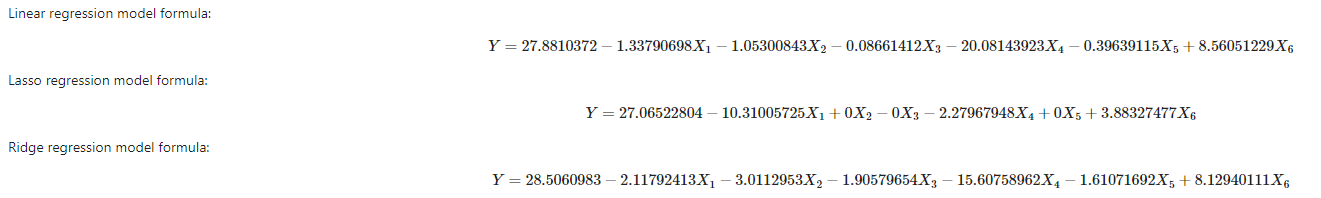

The biggest difference in Ridge and Lasso is that Lasso simultaneously performs variable selection: some coefficients are shrunk to 0, rendering them nonexistence in the original regression model. Therefore, Lasso regression performs very well when you have higher dimensional dataset where some predictors are useless; whereas Ridge works best when all the predictors are needed.

In [195]:
# Or without using 39-44

print('Ridge parameter coefficients  intercept:', ridge.coef_,ridge.intercept_)
print('Lasso parameter coefficients & intercept:', lasso.coef_,lasso.intercept_)
print('Linear model parameter coefficients & intercept:', lin.coef_,lin.intercept_)

Ridge parameter coefficients  intercept: [[ -2.11792413  -3.0112953   -1.90579654 -15.60758962  -1.61071692
    8.12940111]] [28.5060983]
Lasso parameter coefficients & intercept: [-0. -0. -0. -0.  0.  0.] [22.87554745]
Linear model parameter coefficients & intercept: [[ -1.33790698  -1.05300843  -0.08661412 -20.08143923  -0.39639115
    8.56051229]] [27.8810372]


In [205]:
# https://stackoverflow.com/questions/58826825/valueerror-unable-to-coerce-to-series-length-must-be-1-given-n

# The numpy. reshape() function shapes an array without changing the data of the array
y_h_lasso_train = np.reshape(lasso.predict(X_train), (274,1))
y_h_lasso_test = np.reshape(lasso.predict(X_test), (118,1))

# create predictions, predicting y(hat) using Xs (train and test)
y_h_ridge_train = ridge.predict(X_train)
y_h_ridge_test = ridge.predict(X_test)

y_h_lin_train = lin.predict(X_train)
y_h_lin_test = lin.predict(X_test)

C:\Users\aicyb\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


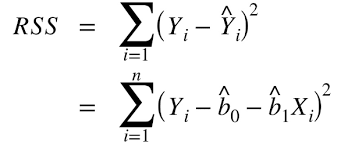

In [206]:
# examine the residual sum of sq
print('Train Error Ridge Model', np.sum((y_train - y_h_ridge_train)**2))
print('Test Error Ridge Model', np.sum((y_test - y_h_ridge_test)**2))
print('\n')

print('Train Error Lasso Model', np.sum((y_train - y_h_lasso_train)**2))
print('Test Error Lasso Model', np.sum((y_test - y_h_lasso_test)**2))
print('\n')

print('Train Error Unpenalized Linear Model', np.sum((y_train - lin.predict(X_train))**2))
print('Test Error Unpenalized Linear Model', np.sum((y_test - lin.predict(X_test))**2))

Train Error Ridge Model mpg    2688.222824
dtype: float64
Test Error Ridge Model mpg    2074.197775
dtype: float64


Train Error Lasso Model mpg    14799.546168
dtype: float64
Test Error Lasso Model mpg    9146.973913
dtype: float64


Train Error Unpenalized Linear Model mpg    2658.043444
dtype: float64
Test Error Unpenalized Linear Model mpg    1976.266987
dtype: float64


We note that Ridge is clearly better than Lasso here, but that the unpenalized model performs best here. Let's see how including Ridge and Lasso changed our parameter estimates.

In [187]:
print('Ridge parameter coefficients:', ridge.coef_)
print('Lasso parameter coefficients:', lasso.coef_)
print('Linear model parameter coefficients:', lin.coef_)

Ridge parameter coefficients: [[ -2.11792413  -3.0112953   -1.90579654 -15.60758962  -1.61071692
    8.12940111]]
Lasso parameter coefficients: [-10.31005725  -0.          -0.          -2.27967948   0.
   3.88327477]
Linear model parameter coefficients: [[ -1.33790698  -1.05300843  -0.08661412 -20.08143923  -0.39639115
    8.56051229]]


Did you notice that Lasso shrinked a few parameters to 0? The Ridge regression mostly affected the fourth parameter (estimated to be -19.26 for the linear regression model).